In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import curve_fit

In [24]:
def bin_centers(bins):
    return np.array([(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)])

In [98]:
def plotdz(xdata, ydata, figsize=(8, 6)):
    fig, ax2 = plt.subplots(1, 1, figsize=figsize)
    ax2.errorbar(xdata, ydata,yerr=np.sqrt(ydata), fmt='o', markersize=2) 
    ax2.set_xlabel("NN (ztrue - zpredicted)",fontsize=14)
    ax2.set_ylabel("Counts/bin",fontsize=14)
    fig.tight_layout()
    plt.show()

In [191]:
def plotfz(xdata, ydata, yfit, norms=None, mus=None, sigmas=None, figsize=(8, 6)):
    if isinstance(norms, tuple):
        n1 = norms[0]/(norms[0]+ norms[1])
        n2 = norms[1]/(norms[0]+ norms[1])
    fig, ax2 = plt.subplots(1, 1, figsize=figsize)
    ax2.errorbar(xdata, ydata,yerr=np.sqrt(ydata), fmt='o', markersize=2)
    if sigmas == None:
        ax2.plot(xdata, yfit, 'red', linewidth=1.0)
    elif isinstance(sigmas, float):
        ax2.plot(xdata, yfit, 'red', linewidth=1.0, 
                label=f"$\sigma$ = {sigmas:.2f}")
        ax2.legend()
    elif isinstance(sigmas, tuple) and norms == None:
        ax2.plot(xdata, yfit, 'red', linewidth=1.0,
                label=f"$\sigma_1$ = {sigmas[0]:.2f}\n $\sigma_2$ = {sigmas[1]:.2f}")
        ax2.legend()
    elif isinstance(sigmas, tuple) and isinstance(norms, tuple):
        ax2.plot(xdata, yfit, 'red', linewidth=1.0,
                label=f"$\sigma_1$(i={n1:.2f}) = {sigmas[0]:.2f}\n $\sigma_2$(i={n2:.2f}) = {sigmas[1]:.2f}")
        ax2.legend()
        
    ax2.set_xlabel("NN (ztrue - zpredicted)",fontsize=14)
    ax2.set_ylabel("Counts/bin",fontsize=14)
    fig.tight_layout()
    plt.show()

In [133]:
def fit_sgaussian(xdata, ydata, pars=[10000., 0.5, 2.0]):
    def gaussian(x, a1, mu1, sigma1):
        return a1*(np.exp(-(x-mu1)**2/(2*sigma1**2)))
        
    pars, cov = curve_fit(gaussian, xdata, ydata, p0=pars)
    err       = np.sqrt(np.diag(cov))
    fit_y     = gaussian(xdata, *pars) 
    return pars, err, fit_y 
 

In [147]:
def fit_dgaussian(xdata, 
                  ydata, 
                  pars=[10000., 0.5, 2.0, 10000., 0.5, 2.0],
                  lower_bounds = [0, -1.0, 0.0, 0.0, -1.0, 0.0]
                  upper_bounds = [100000, 1.0, 15.0, 100000.0, 1.0, 15.0]
                 ):

    def gaussian(x, a1, mu1, sigma1, a2, mu2, sigma2):
        g1 = a1*(np.exp(-(x-mu1)**2/(2*sigma1**2)))
        g2 = a2*(np.exp(-(x-mu2)**2/(2*sigma2**2)))
        return g1 + g2
    
    pars, cov = curve_fit(gaussian, xdata, ydata, p0=pars, 
                          bounds=(lower_bounds, upper_bounds))
    err       = np.sqrt(np.diag(cov))
    fit_y     = gaussian(xdata, *pars) 
    return pars, err, fit_y 


In [202]:
def get_data(file="delta_z_NN.npy", bins=100):
    dz =np.load(file)
    hdz, binsz = np.histogram(dz, bins=bins)
    xdata = bin_centers(binsz)
    ydata = hdz
    return xdata, ydata


In [210]:
def fitcoord(file="delta_z_NN.npy", bins=100):
    xdata, ydata = get_data(file, bins)
    pars, err, yfit = fit_dgaussian(xdata, ydata)
    n1 = pars[0]/(pars[0]+ pars[3])
    n2 = pars[3]/(pars[0]+ pars[3])
    we = weighted_error(pars[2], n1, pars[5], n2)
    print(f"2g fit: mu1 = {pars[1]:.2f}, sigma = {pars[2]:.2f}, n1  ={n1:.2f}")
    print(f"2g fit: mu2 = {pars[4]:.2f}, sigma = {pars[5]:.2f}, n1  ={n2:.2f}")
    print(f"weighter error: = {we:.2f}")
   
    plotfz(xdata, ydata, yfit, 
       norms=(pars[0], pars[3]),
       mus=(pars[1], pars[4]), 
       sigmas=(pars[2], pars[5]),
       figsize=(6, 4))

In [206]:
def weighted_error(sigma1, w1, sigma2, w2):
    return sigma1 * w1 + sigma2 * w2

## Fiting z CsI

In [ ]:
#delta_z_cnn_bgo.npy

In [186]:
xdata, ydata = get_data(file="delta_z_NN.npy", bins=100)

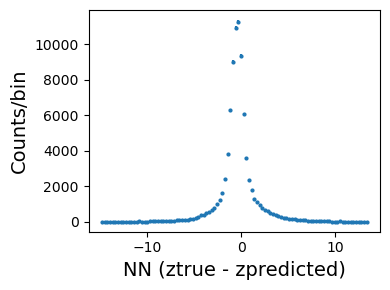

In [187]:
 plotdz(xdata, ydata, figsize=(4, 3))

In [188]:
pars, err, yfit = fit_sgaussian(xdata, ydata, pars=[10000., 0.5, 2.0])
print(f"1g fit: mu = {pars[1]:.2f}, sigma = {pars[2]:.2f}")

1g fit: mu = -0.45, sigma = 0.73


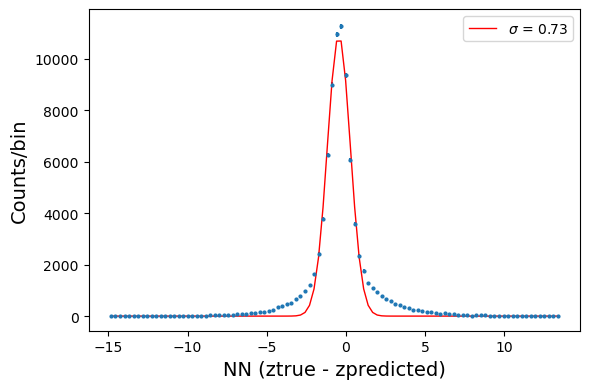

In [192]:
plotfz(xdata, ydata, yfit, mus=pars[1], sigmas=pars[2], figsize=(6, 4))

In [196]:
pars, err, yfit = fit_dgaussian(xdata, ydata, pars=[1000., 0.5, 10.0, 10000., 0.5, 10.0])
n1 = pars[0]/(pars[0]+ pars[3])
n2 = pars[3]/(pars[0]+ pars[3])
print(f"2g fit: mu1 = {pars[1]:.2f}, sigma = {pars[2]:.2f}, n1  ={n1:.2f}")
print(f"2g fit: mu2 = {pars[4]:.2f}, sigma = {pars[5]:.2f}, n1  ={n2:.2f}")

2g fit: mu1 = -0.34, sigma = 2.24, n1  =0.14
2g fit: mu2 = -0.45, sigma = 0.59, n1  =0.86


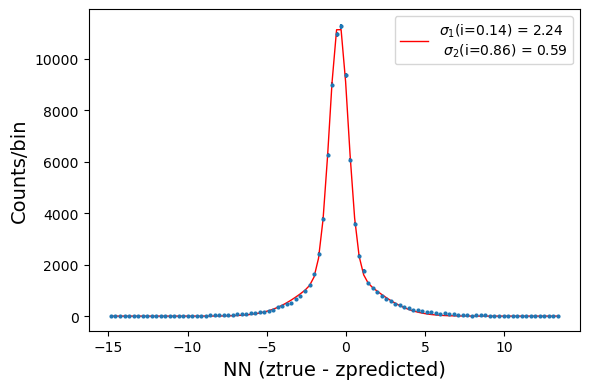

In [197]:
plotfz(xdata, ydata, yfit, 
       norms=(pars[0], pars[3]),
       mus=(pars[1], pars[4]), 
       sigmas=(pars[2], pars[5]),
       figsize=(6, 4))

2g fit: mu1 = -0.34, sigma = 2.24, n1  =0.14
2g fit: mu2 = -0.45, sigma = 0.59, n1  =0.86
weighter error: = 0.82


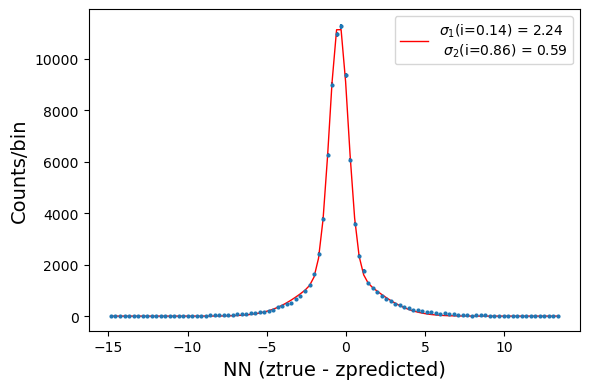

In [211]:
fitcoord(file="delta_z_NN.npy", bins=100)

## Resnet

2g fit: mu1 = 0.08, sigma = 1.98, n1  =0.16
2g fit: mu2 = 0.29, sigma = 0.54, n1  =0.84
weighter error: = 0.77


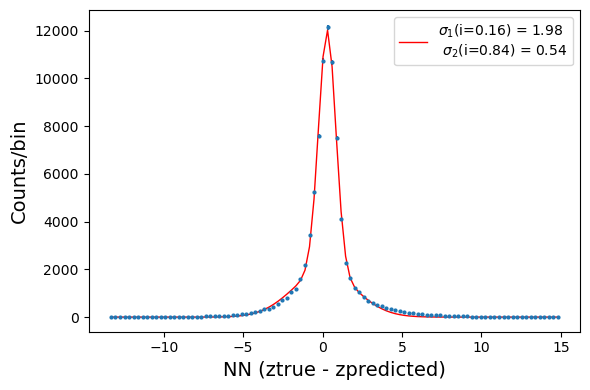

In [212]:
fitcoord(file="delta_z_resnet.npy", bins=100)

## BGO

2g fit: mu1 = -0.15, sigma = 1.51, n1  =0.31
2g fit: mu2 = -0.16, sigma = 0.79, n1  =0.69
weighter error: = 1.02


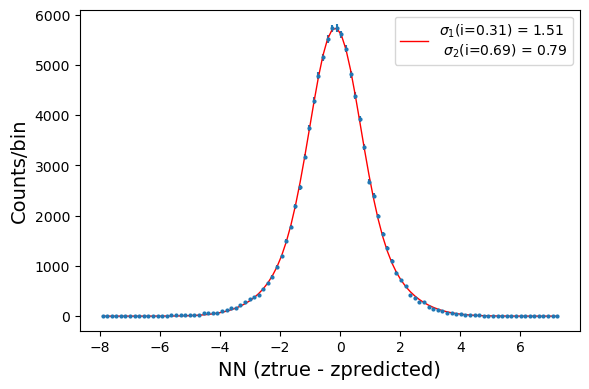

In [213]:
fitcoord(file="delta_z_cnn_bgo.npy", bins=100)

##  XY coord CsI

2g fit: mu1 = -0.07, sigma = 1.41, n1  =0.24
2g fit: mu2 = 0.20, sigma = 0.31, n1  =0.76
weighter error: = 0.58


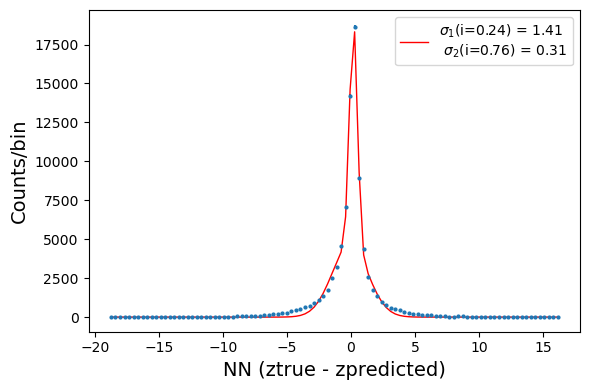

In [214]:
fitcoord(file="delta_x_resnet.npy", bins=100)

2g fit: mu1 = 0.33, sigma = 1.45, n1  =0.25
2g fit: mu2 = 0.19, sigma = 0.32, n1  =0.75
weighter error: = 0.61


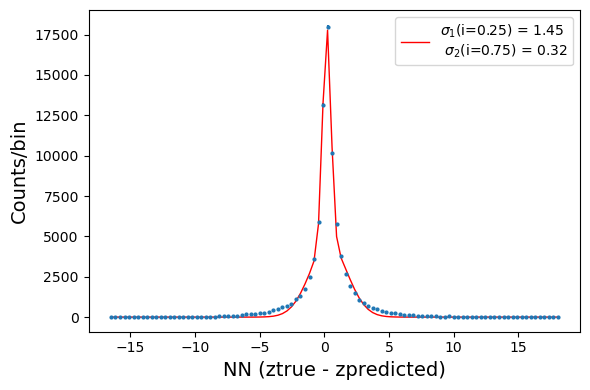

In [215]:
fitcoord(file="delta_y_resnet.npy", bins=100)

##  XY coord BGO

2g fit: mu1 = -0.43, sigma = 0.52, n1  =0.62
2g fit: mu2 = -0.37, sigma = 1.31, n1  =0.38
weighter error: = 0.82


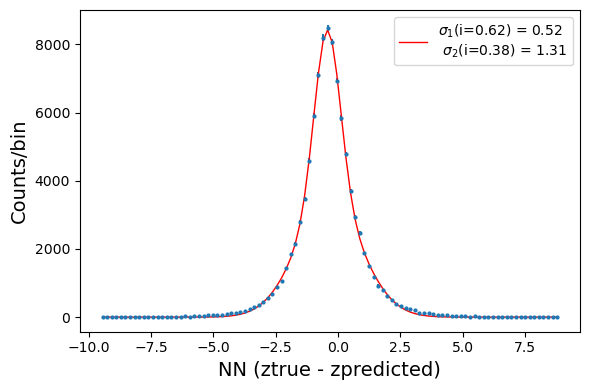

In [217]:
fitcoord(file="delta_x_cnn_bgo.npy", bins=100)

2g fit: mu1 = 0.10, sigma = 1.30, n1  =0.38
2g fit: mu2 = -0.03, sigma = 0.49, n1  =0.62
weighter error: = 0.79


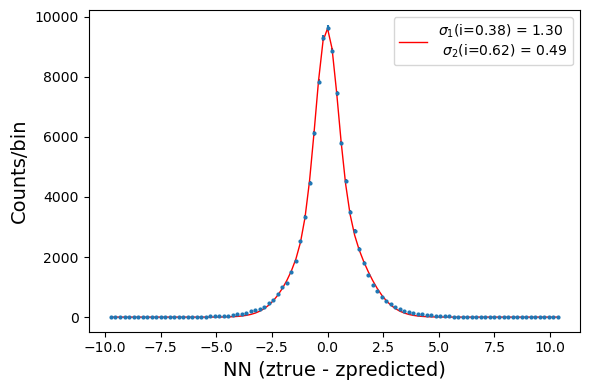

In [219]:
fitcoord(file="delta_y_cnn_bgo.npy", bins=100)